<a href="https://colab.research.google.com/github/Sumit3754/AI-Project/blob/main/Netflix_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix_dataset = pd.read_csv("mymoviedb.csv",encoding="latin1", lineterminator="\n")
netflix_dataset.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [ ]:
#dropped=netflix_dataset.dropna(axis=1)
#dropped.head()

In [ ]:
netflix_dataset["Title"].head()

,Title
0,Spider-Man: No Way Home
1,The Batman
2,No Exit
3,Encanto
4,The King's Man


In [ ]:
netflix_dataset.duplicated().sum()

np.int64(0)

In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9827 non-null   object 
 1   Title         9827 non-null   object 
 2   Popularity    9827 non-null   float64
 3   Vote_Count    9827 non-null   int64  
 4   Vote_Average  9827 non-null   float64
 5   Genre         9827 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 460.8+ KB


In [ ]:
#drop_Na=netflix_dataset.dropna(axis=1, how="all")
#drop_Na

In [ ]:
netflix_dataset.isnull().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [ ]:
netflix_dataset["Genre"].head()

,Genre
0,"Action, Adventure, Science Fiction"
1,"Crime, Mystery, Thriller"
2,Thriller
3,"Animation, Comedy, Family, Fantasy"
4,"Action, Adventure, Thriller, War"


In [ ]:
netflix_dataset.duplicated().sum()

np.int64(0)

In [ ]:
netflix_dataset.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [ ]:
netflix_dataset["Release_Date"] = pd.to_datetime(netflix_dataset["Release_Date"])
print(netflix_dataset["Release_Date"].dtypes)

datetime64[ns]


In [ ]:
netflix_dataset["Release_Date"] = netflix_dataset["Release_Date"].dt.year
netflix_dataset["Release_Date"].dtypes

dtype('int32')

In [ ]:
netflix_dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
# dropping columns
cols=["Overview","Original_Language","Poster_Url"]
netflix_dataset.drop(cols,axis=1, inplace= True)
netflix_dataset.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [ ]:
netflix_dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
# categorizing Vote_Average column
# popular, average, below_average, not_popular


In [ ]:
def categorize_col(netflix_dataset,col,Labels):
  edges =[netflix_dataset[col].describe()["min"],
          netflix_dataset[col].describe()["25%"],
          netflix_dataset[col].describe()["50%"],
          netflix_dataset[col].describe()["75%"],
          netflix_dataset[col].describe()["max"]
          ]

  netflix_dataset[col]= pd.cut(netflix_dataset[col], edges,labels=labels, duplicates="drop")
  return netflix_dataset

In [ ]:
netflix_dataset.head(26)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery
5,2022,The Batman,3827.658,1151,popular,Thriller
6,2022,No Exit,2618.087,122,below_average,Thriller
7,2021,Encanto,2402.201,5076,popular,Animation
8,2021,Encanto,2402.201,5076,popular,Comedy
9,2021,Encanto,2402.201,5076,popular,Family


In [ ]:
labels=["not_popular","below_average","average","popular"]
categorize_col(netflix_dataset, "Vote_Average", labels)
netflix_dataset["Vote_Average"].unique()



In [ ]:
netflix_dataset["Vote_Average"].unique()

['popular', 'below_average', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_average' < 'average' < 'popular']

In [ ]:
netflix_dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [ ]:
netflix_dataset["Vote_Average"].value_counts()

,count
Vote_Average,
average,59166
popular,58010
below_average,57208
not_popular,55403


In [ ]:
netflix_dataset.dropna(inplace=True)
netflix_dataset.isna().sum()

,0
Release_Date,0
Title,0
Popularity,0
Vote_Count,0
Vote_Average,0
Genre,0


In [ ]:
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9727 entries, 0 to 9826
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  9727 non-null   object  
 1   Title         9727 non-null   object  
 2   Popularity    9727 non-null   float64 
 3   Vote_Count    9727 non-null   int64   
 4   Vote_Average  9727 non-null   category
 5   Genre         9727 non-null   object  
dtypes: category(1), float64(1), int64(1), object(3)
memory usage: 465.7+ KB


In [ ]:
netflix_dataset["Genre"] = netflix_dataset["Genre"].str.split(", ")
netflix_dataset = netflix_dataset.explode("Genre").reset_index(drop=True)
netflix_dataset.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


In [ ]:
netflix_dataset["Genre"]= netflix_dataset["Genre"].astype("category")
netflix_dataset["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
netflix_dataset.nunique()

,0
Release_Date,5893
Title,9513
Popularity,8160
Vote_Count,3266
Vote_Average,74
Genre,19


In [ ]:
netflix_dataset.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


In [ ]:
netflix_dataset["Genre"].describe()

,Genre
count,25793
unique,19
top,Drama
freq,3744


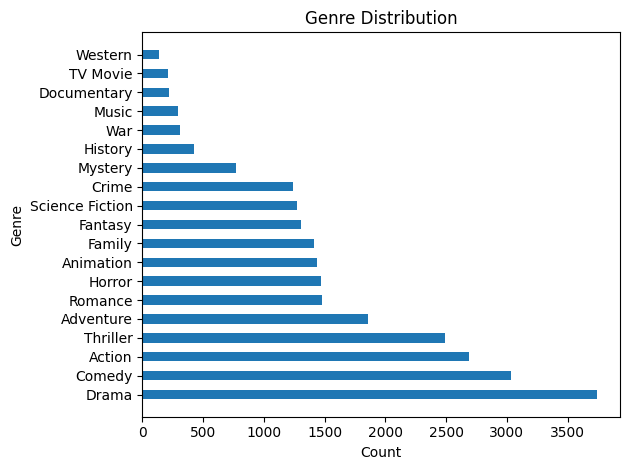

In [ ]:
# First, count the occurrences of each Genre
genre_counts = netflix_dataset['Genre'].value_counts()

# Plot horizontal bar chart
plt.barh(genre_counts.index, genre_counts.values, height=0.5)  # Use `height` not `width` in barh
plt.title("Genre Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


In [ ]:
netflix_dataset["Vote_Average"].describe()

<ipython-input-167-9f6d392b59c4>:1: UserWarning: Unable to sort modes: ufunc 'greater' did not contain a loop with signature matching types (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.StrDType'>) -> None
  netflix_dataset["Vote_Average"].describe().mode()


,Vote_Average
0,25552
1,4
2,not_popular
3,6999


<function matplotlib.pyplot.show(close=None, block=None)>

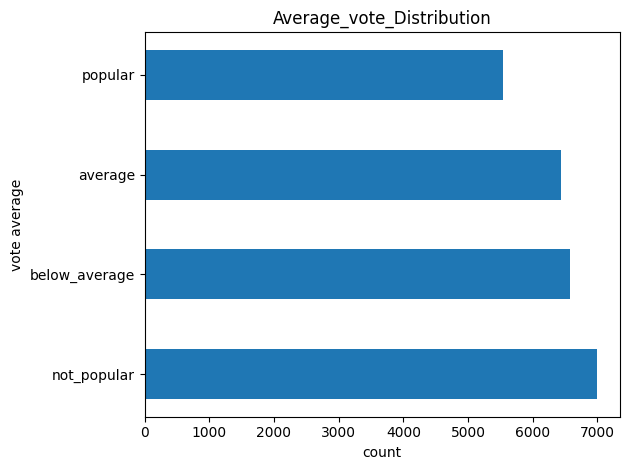

In [ ]:
avg_counts=netflix_dataset["Vote_Average"].value_counts()
plt.barh(avg_counts.index , avg_counts.values, height=0.5)
plt.title("Average_vote_Distribution")
plt.xlabel("count")
plt.ylabel("vote average")
plt.tight_layout()
plt.show

In [ ]:
netflix_dataset.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure


In [ ]:
netflix_dataset[netflix_dataset["Popularity"] == netflix_dataset["Popularity"].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [ ]:
netflix_dataset[netflix_dataset["Popularity"] == netflix_dataset["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25787,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25788,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25789,2021,The United States vs. Billie Holiday,13.354,152,average,History
25790,1984,Threads,13.354,186,popular,War
25791,1984,Threads,13.354,186,popular,Drama
25792,1984,Threads,13.354,186,popular,Science Fiction


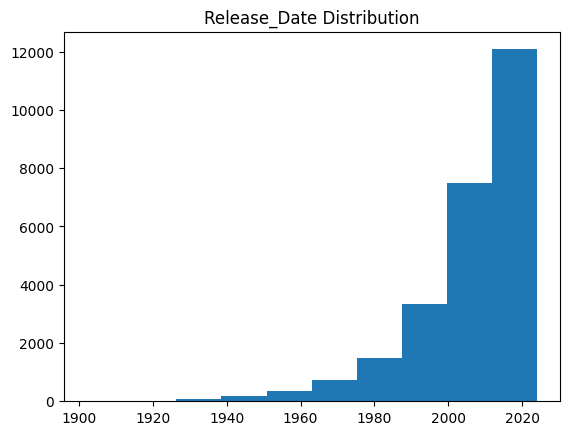

In [ ]:
plt.hist(netflix_dataset["Release_Date"])
plt.title("Release_Date Distribution")

plt.show()